# dbscan

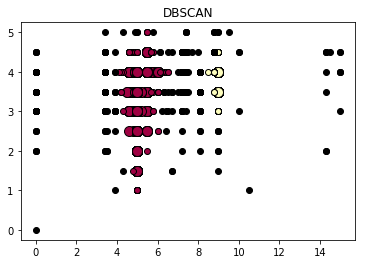

In [17]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


#lectura
y = pd.read_csv('prueba.csv')
y = y.fillna(0)

col1 = y['beer_abv'].values.tolist()
col2 = y['review_taste'].values.tolist()
X = [col1, col2]
X = np.array(X)
X=X.T



db = DBSCAN(eps=0.5, min_samples=100).fit(X)
core_samples_mask = numpy.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
unique_labels = set(labels)
colors = plt.cm.Spectral(numpy.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
	if k == -1:
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=10)
	xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=6)

plt.title("DBSCAN")
plt.show()